In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
images="/content/drive/MyDrive/dataset_processing"

In [ ]:
folders=os.listdir(images)
print(folders)

['negative', 'positive']


In [ ]:
import cv2

image_data=[]
labels=[]

In [ ]:
label_dict={
    'negative':0,
    'positive':1
}

In [ ]:
count=0
from keras.preprocessing import image
try:

    for file in folders:
        try:

            path=os.path.join(images,file)
            print(path)
            count=0
            for im in os.listdir(path):
                try:

                    img=image.load_img(os.path.join(path,im),target_size=((64,64)))
                    img_array=image.img_to_array(img)
                    image_data.append(img_array)
                    labels.append(label_dict[file])
                except:
                    print("Error for processing one image")
            print(count)
        except:
            print("Error in folder")
except:
    print("Done processing")



/content/drive/MyDrive/dataset_processing/negative
0
/content/drive/MyDrive/dataset_processing/positive
0


In [ ]:
 print(len(image_data),len(labels))

5133 5133


In [ ]:
combined = list(zip(image_data,labels))
image_data[:],labels[:]=zip(*combined)

In [ ]:
print(labels)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
x_train=np.array(image_data)
y_train=np.array(labels)

print(x_train.shape,y_train.shape)

(5133, 64, 64, 3) (5133,)


In [ ]:
from tensorflow.python.keras.utils import np_utils

y_train=np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(5133, 64, 64, 3) (5133, 2)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
augment = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.01,
    height_shift_range=0.01,
    horizontal_flip=False,
    vertical_flip=False,
)
augment.fit(x_train)



In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import ResNet50


In [ ]:
# model = VGG16(include_top=False,weights= 'imagenet',input_shape = (64,64,3))
model = ResNet50(weights='imagenet', include_top=False,input_shape=(64,64,3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 70, 70, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 32, 32, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:

for num in range(len(model.layers)):
    print(num,model.layers[num])

0 <keras.src.engine.input_layer.InputLayer object at 0x78d00ff0e020>
1 <keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x78d00ff0ffa0>
2 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x78d00ff64b20>
3 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x78d00ff65540>
4 <keras.src.layers.core.activation.Activation object at 0x78d00ff65180>
5 <keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x78d00ff66410>
6 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x78d00ff673a0>
7 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x78d0005c9720>
8 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x78d0005c9570>
9 <keras.src.layers.core.activation.Activation object at 0x78d0005cb0d0>
10 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x78d0005cb580>
11 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x78d0005c8c40>
12 <keras.src

In [ ]:
# for layer in model.layers:
#   layer.trainable=False
# for i,layer in enumerate(model.layers):
#   print(i,layer.name,layer.trainable)

for layer in model.layers[:169]:
  layer.trainable=False
for i,layer in enumerate(model.layers):
  print(i,layer.name,layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [ ]:
# av1=Flatten()(model.output)
# fc1=Dense(256,activation='relu',kernel_regularizer=l2(0.01),input_dim=256)(av1)
# d1=Dropout(0.5)(fc1)
# fc2=Dense(128,activation='relu',kernel_regularizer=l2(0.01),input_dim=128)(d1)
# d2=Dropout(0.5)(fc2)
# fc3=Dense(2,activation='sigmoid')(d2)

flatten_layer = tf.keras.layers.Flatten()(model.output)
dense_layer = tf.keras.layers.Dense(512, activation='relu')(flatten_layer)
dropout_layer = tf.keras.layers.Dropout(0.5)(dense_layer)
output_layer = tf.keras.layers.Dense(2, activation='sigmoid')(dropout_layer)

model_vgg = tf.keras.Model(inputs=model.input, outputs=output_layer)

# model_vgg=Model(model.input,fc3)
# model_vgg.summary()


In [ ]:
adam=Adam()
model_vgg.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [ ]:


# Train the model with data augmentation and early stopping
hist = model_vgg.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    shuffle=True,
                    validation_split=0.20
                    )


# hist=model_vgg.fit(x_train,y_train, shuffle=True,
#                         batch_size=32,
#                         epochs=20,
#                         validation_split=0.20)

Epoch 1/20
129/129 [==============================] - 15s 41ms/step - loss: 1.1681 - accuracy: 0.6900 - val_loss: 0.4748 - val_accuracy: 0.7897
Epoch 2/20
129/129 [==============================] - 3s 24ms/step - loss: 0.3652 - accuracy: 0.8339 - val_loss: 0.7330 - val_accuracy: 0.6417
Epoch 3/20
129/129 [==============================] - 3s 21ms/step - loss: 0.2190 - accuracy: 0.9106 - val_loss: 0.4893 - val_accuracy: 0.8130
Epoch 4/20
129/129 [==============================] - 3s 21ms/step - loss: 0.1645 - accuracy: 0.9359 - val_loss: 0.6050 - val_accuracy: 0.7838
Epoch 5/20
129/129 [==============================] - 3s 20ms/step - loss: 0.1175 - accuracy: 0.9557 - val_loss: 0.7350 - val_accuracy: 0.7848
Epoch 6/20
129/129 [==============================] - 3s 21ms/step - loss: 0.0791 - accuracy: 0.9700 - val_loss: 1.2084 - val_accuracy: 0.7283
Epoch 7/20
129/129 [==============================] - 3s 23ms/step - loss: 0.0804 - accuracy: 0.9722 - val_loss: 0.7072 - val_accuracy: 0.802

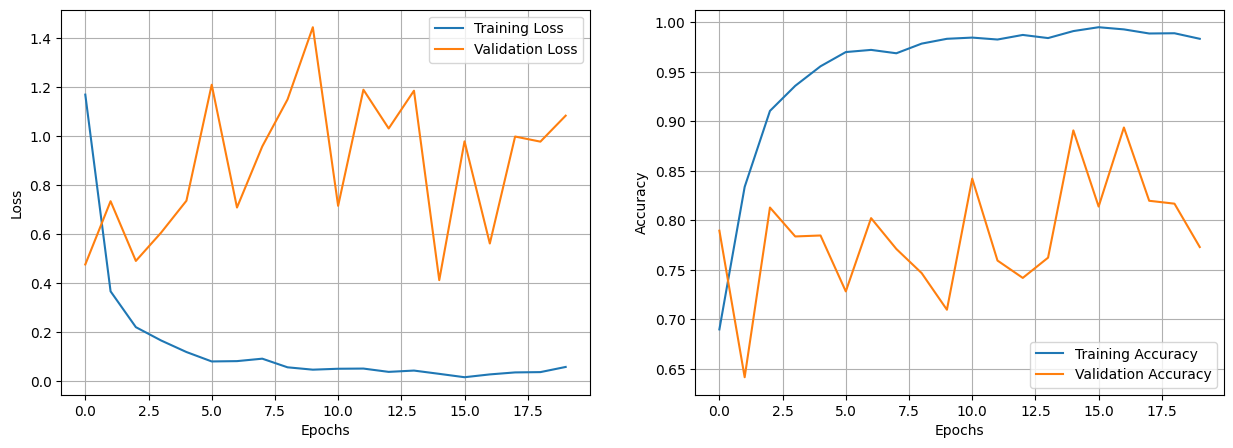

In [ ]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(hist.history["accuracy"],label="Training Accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation Accuracy")
plt.grid(True)
plt.legend()

In [ ]:
model_vgg.save('Parkinson_Detection_VGG.h5')



# test_steps = test_generator.samples // BATCH_SIZE
# loss, accuracy = model.evaluate(test_generator, steps=test_steps)
# print(f'Test Loss: {loss:.4f}')
# print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model('Parkinson_Detection_VGG.h5')

In [ ]:
test_images=r'/content/drive/MyDrive/Validation_Dataset'

test_image_data=[]
test_labels=[]

test_folders=os.listdir(test_images)
print(test_folders)

label_dict={
    'positive':1,
    'negative':0
}
count=0
from keras.preprocessing import image

for file in test_folders:
  path=os.path.join(test_images,file)
  for file1 in os.listdir(path):
    img=image.load_img(os.path.join(path,file1),target_size=((64,64)))
    img_array=image.img_to_array(img)
    test_image_data.append(img_array)
    test_labels.append(label_dict[file])
    count=count+1
  print(count)

combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:]=zip(*combined)


print(test_labels)
x_test=np.array(test_image_data)
y_test=np.array(test_labels)




# hist=model.fit(x_train,y_train,
#                         shuffle=True,
#                         batch_size=32,
#                         epochs=1,
#                         validation_split=0.10)

['positive', 'negative']
715
1655
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
predictions = model.predict(x_test,batch_size=32)
predicted_labels = np.argmax(predictions, axis=1)

52/52 [==============================] - 3s 31ms/step


In [ ]:
accuracy = np.mean(predicted_labels == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 45.68%


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_labels,predicted_labels))
print(confusion_matrix(test_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.66      0.09      0.16       940
           1       0.44      0.94      0.60       715

    accuracy                           0.46      1655
   macro avg       0.55      0.51      0.38      1655
weighted avg       0.57      0.46      0.35      1655

[[ 83 857]
 [ 42 673]]
